# PHASE 1: DATA LOADING & PROFILING

Load raw data from 3 campuses and create profiling summary

## 1. Import Required Libraries

In [197]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Set style for better visualizations
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Create output directory
os.makedirs('outputs', exist_ok=True)

print("="*60)
print("PHASE 1: DATA LOADING & PROFILING")
print("="*60)

PHASE 1: DATA LOADING & PROFILING


## 2. Load Data from All Campuses

In [198]:
# Define campuses
campuses = ['Huye', 'Kigali', 'Musanze']

# Initialize empty lists
all_students = []
all_courses = []
all_assessments = []

# Load data from each campus
for idx, campus in enumerate(campuses, start=1):
    print(f"\n--- Loading {campus} Campus Data ---")
    
    try:
        # Load Students
        students = pd.read_csv(f'raw_data/{campus}_students.csv')
        students['Campus_Name'] = campus
        students['Campus_ID'] = idx
        students['Source_Campus_File'] = f'{campus}_students.csv'
        students['Upload_Date'] = datetime.now()
        all_students.append(students)
        print(f"✓ Students loaded: {len(students)} records")
        
        # Load Courses
        courses = pd.read_csv(f'raw_data/{campus}_courses.csv')
        courses['Campus_Name'] = campus
        courses['Campus_ID'] = idx
        courses['Source_Campus_File'] = f'{campus}_courses.csv'
        courses['Upload_Date'] = datetime.now()
        all_courses.append(courses)
        print(f"✓ Courses loaded: {len(courses)} records")
        
        # Load Assessments
        assessments = pd.read_csv(f'raw_data/{campus}_assessments.csv')
        assessments['Campus_Name'] = campus
        assessments['Campus_ID'] = idx
        assessments['Source_Campus_File'] = f'{campus}_assessments.csv'
        assessments['Upload_Date'] = datetime.now()
        all_assessments.append(assessments)
        print(f"✓ Assessments loaded: {len(assessments)} records")
        
    except FileNotFoundError as e:
        print(f" Error loading {campus} data: {e}")
        print(f"   Make sure files exist in raw_data/ folder")
        print(f"   Run 00_generate_sample_data.py first!")
        raise


--- Loading Huye Campus Data ---
✓ Students loaded: 225 records
✓ Courses loaded: 25 records
✓ Assessments loaded: 2219 records

--- Loading Kigali Campus Data ---
✓ Students loaded: 189 records
✓ Courses loaded: 25 records
✓ Assessments loaded: 1888 records

--- Loading Musanze Campus Data ---
✓ Students loaded: 193 records
✓ Courses loaded: 25 records
✓ Assessments loaded: 2003 records


## 3. Combine Data from All Campuses

In [199]:
print("\n" + "="*60)
print("COMBINING DATA FROM ALL CAMPUSES")
print("="*60)

students_combined = pd.concat(all_students, ignore_index=True)
courses_combined = pd.concat(all_courses, ignore_index=True)
assessments_combined = pd.concat(all_assessments, ignore_index=True)

print(f"\n✓ Total Students: {len(students_combined)}")
print(f"✓ Total Courses: {len(courses_combined)}")
print(f"✓ Total Assessments: {len(assessments_combined)}")


COMBINING DATA FROM ALL CAMPUSES

✓ Total Students: 607
✓ Total Courses: 75
✓ Total Assessments: 6110


## 4. Data Profiling Functions

In [200]:
def profile_dataframe(df, name):
    """Create comprehensive profiling summary"""
    print(f"\n--- {name} Dataset ---")
    print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
    print(f"\nColumn Names: {', '.join(df.columns)}")
    print(f"\nData Types:")
    print(df.dtypes)
    
    print(f"\nMissing Values:")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_summary = pd.DataFrame({
        'Missing_Count': missing,
        'Missing_Percentage': missing_pct.round(2)
    })
    missing_df = missing_summary[missing_summary['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
    
    if len(missing_df) > 0:
        print(missing_df)
    else:
        print("No missing values found")
    
    print(f"\nDuplicate Rows: {df.duplicated().sum()}")
    
    print(f"\nFirst 5 rows:")
    print(df.head())
    
    print(f"\nBasic Statistics (numeric columns):")
    print(df.describe())


## 5. Profile Each Dataset

In [201]:
print("\n" + "="*60)
print("DATA PROFILING SUMMARY")
print("="*60)

students_profile = profile_dataframe(students_combined, "STUDENTS")


DATA PROFILING SUMMARY

--- STUDENTS Dataset ---
Shape: 607 rows × 14 columns

Column Names: Student_ID, First_Name, Last_Name, Gender, DOB, Phone, Email, Program, Level, Intake_Year, Campus_Name, Campus_ID, Source_Campus_File, Upload_Date

Data Types:
Student_ID                       str
First_Name                       str
Last_Name                        str
Gender                           str
DOB                              str
Phone                        float64
Email                            str
Program                          str
Level                          int64
Intake_Year                    int64
Campus_Name                      str
Campus_ID                      int64
Source_Campus_File               str
Upload_Date           datetime64[us]
dtype: object

Missing Values:
        Missing_Count  Missing_Percentage
DOB                25                4.12
Gender             24                3.95
Phone              24                3.95

Duplicate Rows: 18

First 5 

In [202]:
courses_profile = profile_dataframe(courses_combined, "COURSES")


--- COURSES Dataset ---
Shape: 75 rows × 10 columns

Column Names: Course_Code, Course_Title, Credits, Program, Level, Semester, Campus_Name, Campus_ID, Source_Campus_File, Upload_Date

Data Types:
Course_Code                      str
Course_Title                     str
Credits                      float64
Program                          str
Level                          int64
Semester                       int64
Campus_Name                      str
Campus_ID                      int64
Source_Campus_File               str
Upload_Date           datetime64[us]
dtype: object

Missing Values:
         Missing_Count  Missing_Percentage
Credits              6                 8.0

Duplicate Rows: 0

First 5 rows:
  Course_Code                  Course_Title  Credits                 Program  \
0      ICT101    Programming Fundamentals        4.0  Information Technology   
1      ICT102              Database Systems      4.0  Information Technology   
2      ICT103               Web Developm

In [203]:
assessments_profile = profile_dataframe(assessments_combined, "ASSESSMENTS")


--- ASSESSMENTS Dataset ---
Shape: 6110 rows × 12 columns

Column Names: Student_ID, Course_Code, Assessment_Type, Mark, Assessment_Date, Academic_Year, Semester, Attendance_Rate, Campus_Name, Campus_ID, Source_Campus_File, Upload_Date

Data Types:
Student_ID                       str
Course_Code                      str
Assessment_Type                  str
Mark                         float64
Assessment_Date                  str
Academic_Year                    str
Semester                       int64
Attendance_Rate              float64
Campus_Name                      str
Campus_ID                      int64
Source_Campus_File               str
Upload_Date           datetime64[us]
dtype: object

Missing Values:
                 Missing_Count  Missing_Percentage
Attendance_Rate            610                9.98
Mark                       486                7.95

Duplicate Rows: 27

First 5 rows:
  Student_ID  Course_Code Assessment_Type   Mark Assessment_Date  \
0    RPH0001  -B-A-

## 6. Visualization 1: Missing Values Assessment


GENERATING VISUALIZATIONS
✓ Saved: outputs/01_missing_values_profile.png


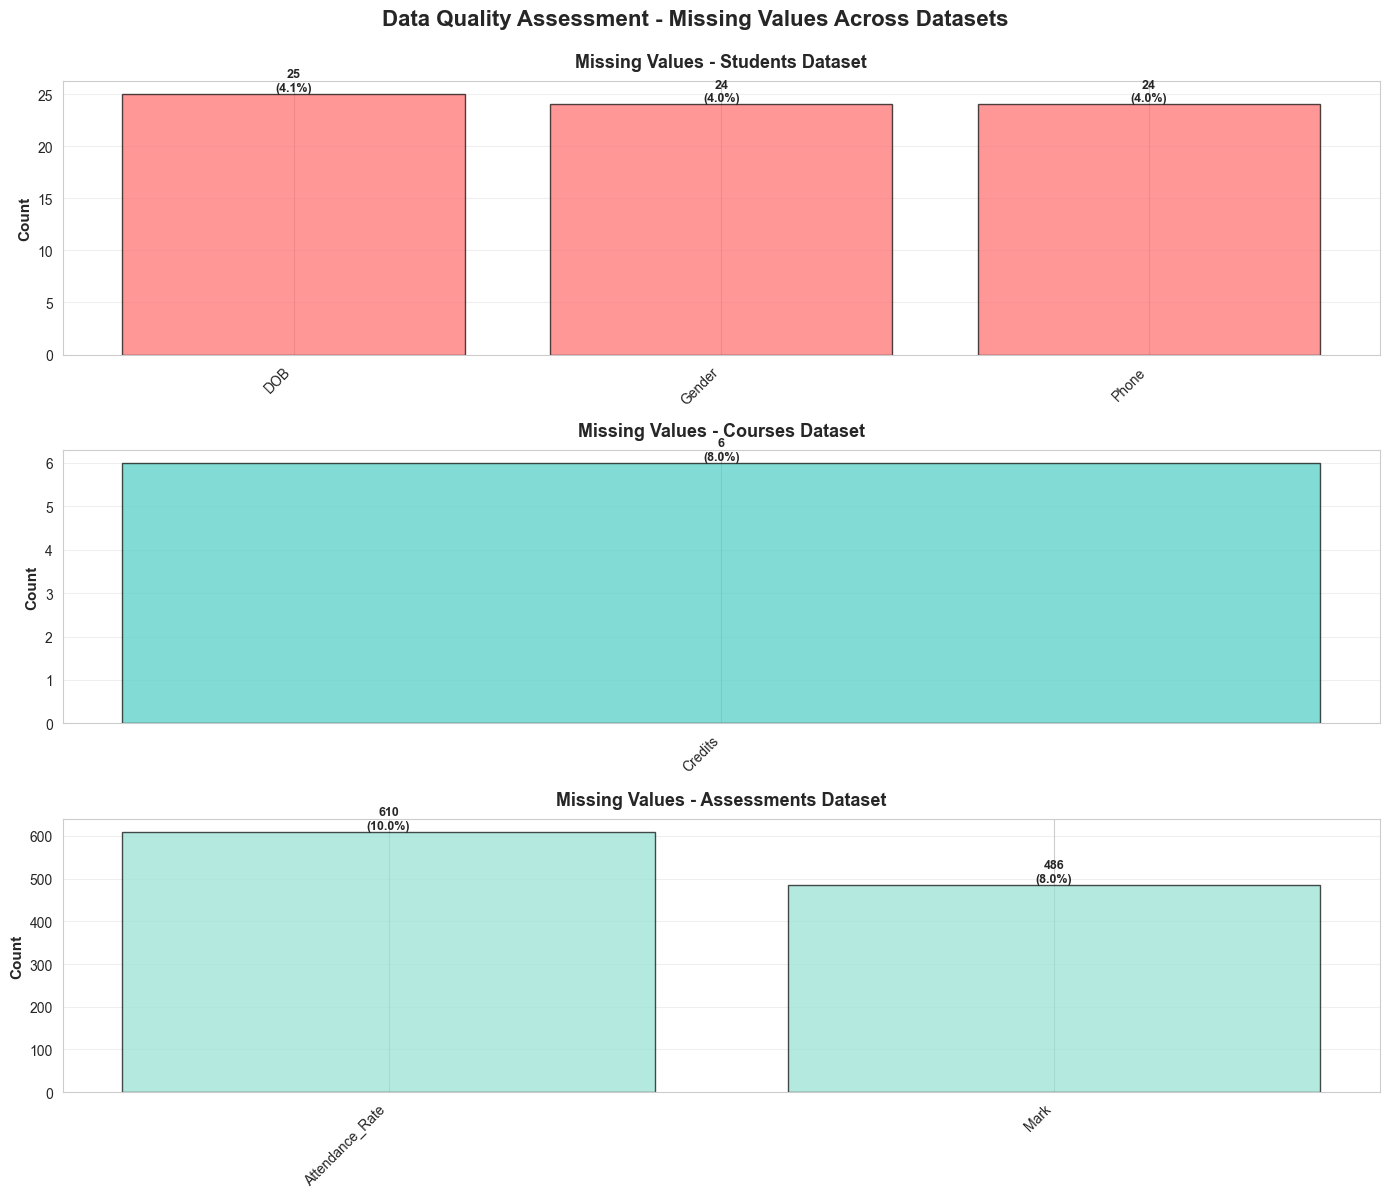

In [204]:
print("\n" + "="*60)
print("GENERATING VISUALIZATIONS")
print("="*60)

def plot_missing(df, ax, title, color):
    """Helper function to plot missing values"""
    missing = df.isnull().sum()
    missing = missing[missing > 0].sort_values(ascending=False)
    
    if len(missing) > 0:
        bars = ax.bar(range(len(missing)), missing.values, color=color, alpha=0.7, edgecolor='black')
        ax.set_xticks(range(len(missing)))
        ax.set_xticklabels(missing.index, rotation=45, ha='right')
        ax.set_ylabel('Count', fontsize=11, fontweight='bold')
        ax.set_title(title, fontsize=13, fontweight='bold', pad=10)
        ax.grid(axis='y', alpha=0.3)
        
        # Add value labels on bars
        for i, (bar, val) in enumerate(zip(bars, missing.values)):
            height = bar.get_height()
            pct = (val / len(df)) * 100
            ax.text(bar.get_x() + bar.get_width()/2., height,
                   f'{int(val)}\n({pct:.1f}%)',
                   ha='center', va='bottom', fontsize=9, fontweight='bold')
    else:
        ax.text(0.5, 0.5, 'No missing values detected', 
               ha='center', va='center', fontsize=12, transform=ax.transAxes)
        ax.set_title(title, fontsize=13, fontweight='bold')
        ax.axis('off')

# Create the figure
fig, axes = plt.subplots(3, 1, figsize=(14, 12))
fig.suptitle('Data Quality Assessment - Missing Values Across Datasets', 
             fontsize=16, fontweight='bold', y=0.995)

plot_missing(students_combined, axes[0], 'Missing Values - Students Dataset', '#FF6B6B')
plot_missing(courses_combined, axes[1], 'Missing Values - Courses Dataset', '#4ECDC4')
plot_missing(assessments_combined, axes[2], 'Missing Values - Assessments Dataset', '#95E1D3')

plt.tight_layout()
plt.savefig('outputs/01_missing_values_profile.png', dpi=300, bbox_inches='tight')
print("✓ Saved: outputs/01_missing_values_profile.png")
plt.show()

## 7. Visualization 2: Data Distribution by Campus

✓ Saved: outputs/01_campus_distribution.png


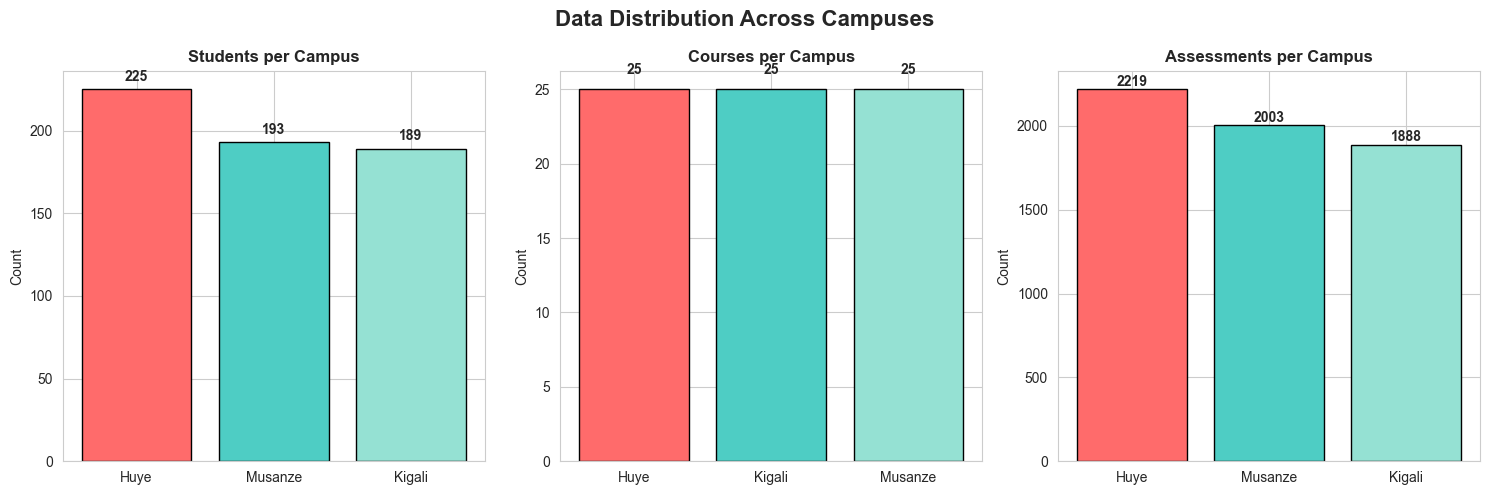

In [205]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Data Distribution Across Campuses', fontsize=16, fontweight='bold')

campus_counts_students = students_combined['Campus_Name'].value_counts()
campus_counts_courses = courses_combined['Campus_Name'].value_counts()
campus_counts_assessments = assessments_combined['Campus_Name'].value_counts()

axes[0].bar(campus_counts_students.index, campus_counts_students.values, 
           color=['#FF6B6B', '#4ECDC4', '#95E1D3'], edgecolor='black')
axes[0].set_title('Students per Campus', fontweight='bold')
axes[0].set_ylabel('Count')
for i, v in enumerate(campus_counts_students.values):
    axes[0].text(i, v + 5, str(v), ha='center', fontweight='bold')

axes[1].bar(campus_counts_courses.index, campus_counts_courses.values,
           color=['#FF6B6B', '#4ECDC4', '#95E1D3'], edgecolor='black')
axes[1].set_title('Courses per Campus', fontweight='bold')
axes[1].set_ylabel('Count')
for i, v in enumerate(campus_counts_courses.values):
    axes[1].text(i, v + 1, str(v), ha='center', fontweight='bold')

axes[2].bar(campus_counts_assessments.index, campus_counts_assessments.values,
           color=['#FF6B6B', '#4ECDC4', '#95E1D3'], edgecolor='black')
axes[2].set_title('Assessments per Campus', fontweight='bold')
axes[2].set_ylabel('Count')
for i, v in enumerate(campus_counts_assessments.values):
    axes[2].text(i, v + 20, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/01_campus_distribution.png', dpi=300, bbox_inches='tight')
print("✓ Saved: outputs/01_campus_distribution.png")
plt.show()

## 8. Visualization 3: Raw Mark Distribution

✓ Saved: outputs/01_mark_distribution_raw.png


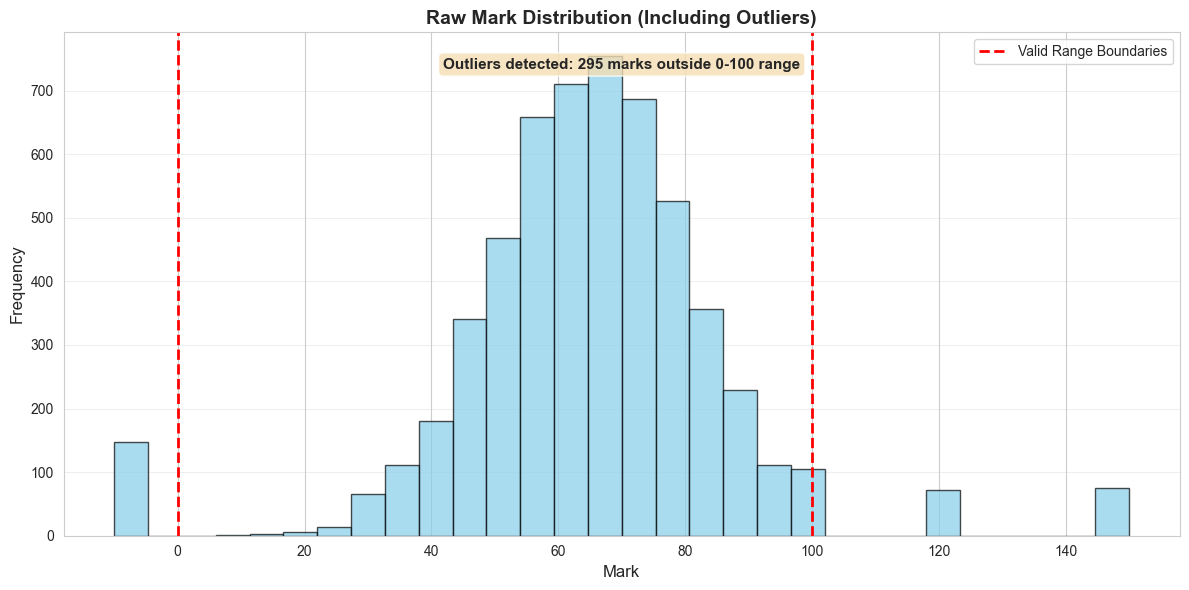

In [206]:
fig, ax = plt.subplots(figsize=(12, 6))
assessments_combined['Mark'].hist(bins=30, ax=ax, color='skyblue', edgecolor='black', alpha=0.7)
ax.set_title('Raw Mark Distribution (Including Outliers)', fontsize=14, fontweight='bold')
ax.set_xlabel('Mark', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.axvline(0, color='red', linestyle='--', linewidth=2, label='Valid Range Boundaries')
ax.axvline(100, color='red', linestyle='--', linewidth=2)
ax.legend()
ax.grid(axis='y', alpha=0.3)

# Highlight outliers
outliers = assessments_combined[(assessments_combined['Mark'] < 0) | (assessments_combined['Mark'] > 100)]
outlier_text = f"Outliers detected: {len(outliers)} marks outside 0-100 range"
ax.text(0.5, 0.95, outlier_text, transform=ax.transAxes, 
       ha='center', va='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8),
       fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('outputs/01_mark_distribution_raw.png', dpi=300, bbox_inches='tight')
print("✓ Saved: outputs/01_mark_distribution_raw.png")
plt.show()

## 9. Save Combined Datasets

In [207]:
students_combined.to_csv('outputs/students_raw_combined.csv', index=False)
courses_combined.to_csv('outputs/courses_raw_combined.csv', index=False)
assessments_combined.to_csv('outputs/assessments_raw_combined.csv', index=False)
print("\n✓ Saved raw combined datasets to outputs/ folder")


✓ Saved raw combined datasets to outputs/ folder


## 10. Summary

In [208]:
print("\n" + "="*60)
print("PHASE 1 COMPLETE!")
print("="*60)
print("\nDeliverables created:")
print("  ✓ outputs/students_raw_combined.csv")
print("  ✓ outputs/courses_raw_combined.csv")
print("  ✓ outputs/assessments_raw_combined.csv")
print("  ✓ outputs/01_profiling_summary.txt")
print("  ✓ outputs/01_missing_values_profile.png")
print("  ✓ outputs/01_campus_distribution.png")
print("  ✓ outputs/01_mark_distribution_raw.png")
print("\nNext step: Run 02_cleaning_pipeline.py")


PHASE 1 COMPLETE!

Deliverables created:
  ✓ outputs/students_raw_combined.csv
  ✓ outputs/courses_raw_combined.csv
  ✓ outputs/assessments_raw_combined.csv
  ✓ outputs/01_profiling_summary.txt
  ✓ outputs/01_missing_values_profile.png
  ✓ outputs/01_campus_distribution.png
  ✓ outputs/01_mark_distribution_raw.png

Next step: Run 02_cleaning_pipeline.py
